In [1]:
import pandas as pd
import os
import random
import alpaca_trade_api as tradeapi

In [2]:
alpaca = tradeapi.REST()

In [44]:
companies = ["IPHI","AMAT","SPWR","QCOM","ARW","MXIM","TXN","AMD","NVDA","LSCC","ENPH","RUN","SEDG"]
df = alpaca.get_barset(companies, timeframe="day", limit=300).df

In [9]:
closes = df.xs("close",axis="columns",level=1)
returns = closes.pct_change()
returns.head()

,AMAT,AMD,ARW,ENPH,IPHI,LSCC,MXIM,NVDA,QCOM,RUN,SEDG,SPWR,TXN
time,,,,,,,,,,,,,
2019-08-12 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-13 00:00:00-04:00,0.034661,-0.010173,0.018112,0.041275,0.013191,0.024168,0.018086,0.030571,0.034384,0.008120,0.013275,0.017424,0.027149
2019-08-14 00:00:00-04:00,-0.028298,-0.057926,-0.035580,-0.060159,-0.009725,-0.032512,-0.033494,-0.038506,-0.018144,-0.062577,-0.035316,-0.079747,-0.022215
2019-08-15 00:00:00-04:00,0.009797,-0.019504,-0.010198,-0.014886,0.002376,-0.001084,0.004212,-0.008479,0.003668,-0.029081,-0.030704,0.004127,-0.006053
2019-08-16 00:00:00-04:00,-0.011398,0.051247,0.031515,0.075890,0.022124,0.034726,0.031649,0.071859,0.029656,0.047651,0.020712,0.038276,0.024527


In [11]:
correlation = returns.corr()

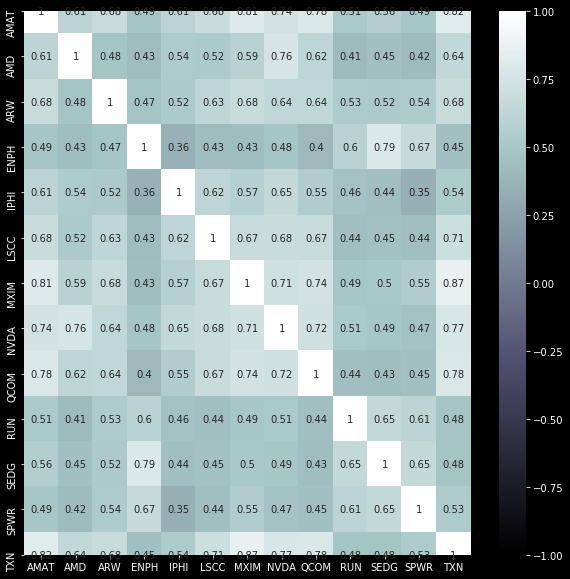

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmin=-1, vmax=1, cmap="bone", annot=True)

In [21]:
preweight = [random.random() for w in range(13)]
weightsum = sum(preweight)
weights = [w/weightsum for w in preweight]

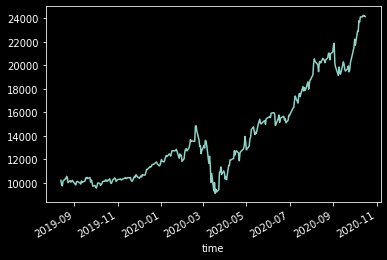

In [22]:
initial = 10000
portfolio_returns = returns.dot(weights)
cumulative_returns = (1+portfolio_returns).cumprod()
(initial*cumulative_returns).plot()

In [29]:
results = pd.DataFrame({
    "Weights":[],
    "Total_Return":[],
    "Risk":[],
    "Sharpe":[]
})
trials = 5000
risk_free_rate = 0.0072

for run in range(trials):

    preweight = [random.random() for w in range(len(companies))]
    weightsum = sum(preweight)
    weights = [w/weightsum for w in preweight]

    initial = 10000
    portfolio_returns = returns.dot(weights)
    cumulative_returns = (1+portfolio_returns).cumprod()

    risk = portfolio_returns.std()
    total_return = cumulative_returns[-1]

    results = results.append({
        "Weights":weights,
        "Total_Return": total_return,
        "Risk": risk,
        "Sharpe": (total_return-risk_free_rate)/risk
    }, ignore_index=True)

results.head()


,Weights,Total_Return,Risk,Sharpe
0,"[0.08228727317405266, 0.09802952112438205, 0.1...",2.107319,0.029439,71.337198
1,"[0.08599779227799483, 0.10437703359157428, 0.0...",2.046117,0.028645,71.177619
2,"[0.09545591608768514, 0.023331647140304074, 0....",2.300503,0.030206,75.922960
3,"[0.12910268020628948, 0.0257637253559114, 0.04...",2.474052,0.029707,83.040492
4,"[0.09629633786837231, 0.0697104228754703, 0.13...",2.181897,0.029519,73.669854


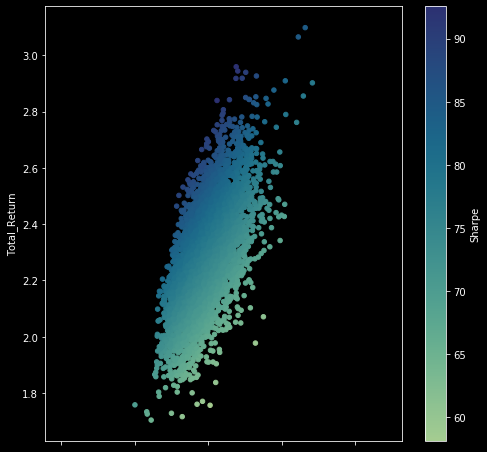

In [41]:
results.plot(kind="scatter", x="Risk", y="Total_Return", c="Sharpe", colormap="crest", figsize=(8,8))

In [35]:
results[results["Sharpe"]>90 ].sort_values("Sharpe", ascending=False)

,Weights,Total_Return,Risk,Sharpe
2201,"[0.002831367172038469, 0.1655244651390435, 0.0...",2.839307,0.030598,92.559256
3301,"[0.00557357161928401, 0.09479759568718188, 0.0...",2.959103,0.031901,92.531844
173,"[0.03181634344887679, 0.1583278760717322, 0.00...",2.943944,0.032010,91.745823
1670,"[0.007963621612594963, 0.14809791534363467, 0....",2.917672,0.031885,91.281684
1606,"[0.001733026350837307, 0.008713093289460334, 0...",2.806510,0.031030,90.213277
1971,"[0.02581601205812262, 0.0997279745305886, 0.04...",2.841991,0.031445,90.151110
2168,"[0.0743477235804868, 0.1478831448217655, 0.006...",2.702368,0.029908,90.115354
3917,"[0.03505091986814502, 0.004593506065740394, 0....",2.918323,0.032311,90.097311
4278,"[0.007331897315241159, 0.04214815862695295, 0....",2.939297,0.032553,90.071181


In [46]:
best_weights = results.iloc[2201]["Weights"]
best_weights

[0.002831367172038469,
 0.1655244651390435,
 0.08534221978592825,
 0.044862867066978215,
 0.1054543129846473,
 0.11106979292629728,
 0.013601202158766278,
 0.1576845189460509,
 0.0012822516440084255,
 0.1424565744257917,
 0.12432847920482533,
 0.03826982937390939,
 0.007292119171714891]

In [48]:
list(zip(companies, best_weights))

[('IPHI', 0.002831367172038469),
 ('AMAT', 0.1655244651390435),
 ('SPWR', 0.08534221978592825),
 ('QCOM', 0.044862867066978215),
 ('ARW', 0.1054543129846473),
 ('MXIM', 0.11106979292629728),
 ('TXN', 0.013601202158766278),
 ('AMD', 0.1576845189460509),
 ('NVDA', 0.0012822516440084255),
 ('LSCC', 0.1424565744257917),
 ('ENPH', 0.12432847920482533),
 ('RUN', 0.03826982937390939),
 ('SEDG', 0.007292119171714891)]

In [51]:
portfolio = pd.DataFrame(list(zip(companies, best_weights)))
portfolio.columns = ["company", "weighting"]
portfolio["equity"] = portfolio["weighting"]*10000
portfolio

,company,weighting,equity
0,IPHI,0.002831,28.313672
1,AMAT,0.165524,1655.244651
2,SPWR,0.085342,853.422198
3,QCOM,0.044863,448.628671
4,ARW,0.105454,1054.543130
5,MXIM,0.111070,1110.697929
6,TXN,0.013601,136.012022
7,AMD,0.157685,1576.845189
8,NVDA,0.001282,12.822516
9,LSCC,0.142457,1424.565744
